# Season 5 - Script Analysis

![SegmentLocal](../Images/9.jpg "poster")

![SegmentLocal](../Images/10.gif "poster")

In [13]:
import os      
import pandas as pd
import plotly.graph_objects as go
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.summarizers.lsa import LsaSummarizer
from sumy.nlp.tokenizers import Tokenizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
folder = "../Data/Scripts/Season 5/"
txt_files = os.listdir(folder)   
print(txt_files)

['05x01 - The Crowening.txt', '05x02 - Love Letters.txt', '05x03 - The Plant.txt', '05x04 - The Dress.txt', '05x05 - Housewarming.txt', '05x06 - Rock On!.txt', '05x07 - A Whisper of Desire.txt', '05x08 - The Hospies.txt', '05x09 - The M.V.P..txt', '05x10 - Roadkill.txt', '05x11 - Meet the Parents.txt', '05x12 - The Roast.txt', '05x13 - The Hike.txt', '05x14 - Life is a Cabaret.txt']


In [6]:
corpus = []

for file_path in txt_files:
    with open(folder+file_path,encoding='utf8') as f_input:
        corpus.append(f_input.read())

print(corpus[0])

(Cell phone rings) Johnny: Kids! Your mother's on the phone, and it's her first day on set, so let's all make sure we keep her spirits high, okay? Alexis, come on. Mr. Rose, I think you should answer it. Yeah, she's over there all by herself, so it's gotta be stressful, right? - I mean, the jet lag, and... - Oh my God, answer the phone! - That's why-that's why... - Answer the phone, please! Put her on speaker, how do you put her on speaker? - Arghhh! - Speaker, speaker. Yeah, hello? Moira? - Moira: John? Hello? Hello? Moira? David, I don't think she can hear me! John, are you there? Yeah, I'm here, everybody's here. I expected to hear from you yesterday. Kids, say hi to your mother. - Hey. - Hi... - She-she's not my mother. - Who are those voices? Uh, your children! Oh Alexis, do you have strep again? - That was David! - Is that Stevie? Hi. David! Oh, David, how's the store? Any new customers, or is it still friendless? Okay, thank you. And John, I know disoriented you get in my absenc

In [7]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "C:/Users/acham/Desktop/schitts-creek.json"
#print('Credendtials from environ: {}'.format(os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')))
# Instantiates a client
client = language.LanguageServiceClient()
# The text to analyze

neg = 0
pos = 0
s_pos = 0
neu = 0

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)

    #print('Text: {}'.format(text))
    analysis = ''
    if sentiment.score == 0:
        analysis = 'Neutral'
        neu+=1
    elif sentiment.score < 0:
        analysis = 'Negative'
        neg+=1
    elif sentiment.score > 0 and sentiment.score < 0.5 :
        analysis = 'Slightly Positive'
        s_pos+=1
    else:
        analysis = 'Positive'
        pos+=1
    print('Document: '+ txt_files[i][:-4] )
    print('Sentiment Prediction: {}, Sentiment Analysis: {}'.format(sentiment.score, analysis))
    print("")
    print("")
sentiment_analysis = [pos, s_pos, neu, neg]
names_analysis = ["Positive", "Slightly Positive", "Neutral", "Negative"]


    #print('Sentiment: {}'.format(response))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Document: 05x01 - The Crowening
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x02 - Love Letters
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x03 - The Plant
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x04 - The Dress
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x05 - Housewarming
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x06 - Rock On!
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x07 - A Whisper of Desire
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x08 - The Hospies
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x09 - The M.V.P.
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x10 - Roadkill
Sentiment Prediction: -0.10000000149011612, Sentiment Analysis: Negative


Document: 05x11 - Meet the Parents
Sentiment Prediction: 0.0, Sentiment Analysis: Neutral


Document: 05x12 - T

In [8]:
per = 0
num = 0
con = 0
eve = 0
loc = 0
org = 0

persons = []

numbers = []

consumers = []

events = []

locations = []

organizations = []

for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    person = []
    number = []
    consumer = []
    event = []
    location = []
    organization = []
    
    for j in range(len(response.entities)):
        if (response.entities[j].type) == 1:
            person.append(response.entities[j].name)
            persons.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 12:
            number.append(response.entities[j].name)
            numbers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 6:
            consumer.append(response.entities[j].name)
            consumers.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 4:
            event.append(response.entities[j].name)
            events.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 2:
            location.append(response.entities[j].name)
            locations.append(str(response.entities[j].name))
        elif (response.entities[j].type) == 3:
            organization.append(response.entities[j].name)
            organizations.append(str(response.entities[j].name))
        
    print('Person Entities Named in '+txt_files[i][:-4] + " Letter")
    print(person)
    per += len(person)

    print("")
    print('Number Entities Named in '+txt_files[i][:-4] + " Letter")
    print(number)
    num += len(number)

    print("")
    print('Consumer Entities Named in '+txt_files[i][:-4] + " Letter")
    print(consumer)
    con += len(consumer)
    print("")
    print('Event Entities Named in '+txt_files[i][:-4] + " Letter")
    print(event)
    eve += len(event)
    print("")
    print('Location Entities Named in '+txt_files[i][:-4] + " Letter")
    print(location)
    loc += len(location)
    print("")
    print('Organization Entities Named in '+txt_files[i][:-4] + " Letter")
    print(organization)
    org += len(organization)
    print("")
    print("")
        
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
    #print('Sentiment: {}'.format(response3))

Person Entities Named in 05x01 - The Crowening Letter
['artist', 'Johnny', 'outcasts', 'Alexis: Hey David', 'Johnny', 'Rose', 'mother', 'Rose', 'Alexis', 'Moira', 'Speaker', 'Stevie', 'guys', 'Kids', 'everybody', 'John', 'mother', 'customers', 'Kids', 'Kids', 'someone', 'director', 'Moira: John?', 'children', 'people', 'Dad', 'Clara Beatrice Mandrake', 'guy', 'Blaire', 'bud', 'Hamza', 'Generator', 'Dog', 'Moira Rose', 'Ted', 'vet', 'marriage counselor', 'teamster brethren', 'Patrick', 'generator', 'one', 'no one', 'goddess', 'wife', 'producers', 'director', 'each other', 'dermatologist', 'each other', 'Patrick', 'family', 'toadstool man', 'Stan Kubrick', 'Shelley', 'Everybody', 'wife', 'businesswomen', 'Stevie: Point', 'Maura', 'many', 'Nobody', 'guests', 'I-I', 'guys', 'Bell', 'Twyla', 'Caroline Kennedy', 'Sandy Bullock', 'Dickensian', 'humans', 'Captain', 'Anderson Cooper', 'babe', 'babe', 'babe', 'father', 'person', 'Sir', 'Babe', 'others']

Number Entities Named in 05x01 - The Crow

Person Entities Named in 05x05 - Housewarming Letter
['John', 'Jocelyn', 'David', 'Patrick', 'Johnny', 'Moira', 'Ted', 'Stevie', 'parents', 'Alexis', 'bebe', 'housecoat', 'guy', 'God', 'Adelina', 'Ronnie', 'Joyce DeWitt', 'boyfriend', 'babysitter', 'everyone', 'everyone', 'cousin', 'guys', 'someone', 'kid', 'kid', 'boyfriend', 'couple', 'parents', 'brother', 'kids', 'partner', 'Rose', 'children', 'teen actors', 'lady', 'Baby', 'Linda', 'best friend', 'baby', 'miracle baby', 'guy', 'Rollie', 'Mullens', 'participant', 'people', 'Partygoers', 'Partygoers', 'baby', 'Ron', 'Baby', 'one', 'Partygoers', 'baby', 'anyone', 'pizza delivery guys', 'bitch', 'people', 'kid', 'kid', 'one', 'parents', 'pizza delivery person', 'people', 'boyfriend', 'Mr.', 'astrophysicists', 'Jocelyn: Hi', 'few', 'Boop', 'anyone', 'babe', 'daughter', 'mom', 'Woman', 'dad', 'anybody', 'people', 'Man', 'Muah', 'light sleeper', 'binger', 'Roland Jr', 'everyone', 'everyone', 'guy', 'guy', 'Hef', 'Twyla', 'gosh', 'brother'

Person Entities Named in 05x09 - The M.V.P. Letter
['David Rose', 'Johnny: David', 'Stevie', 'Johnny', 'fielder', 'Ronnie', 'Patrick', 'Gwen', 'Jocelyn', 'Popeye', 'player', 'Lorenzo', 'player', 'players', 'cousin', 'player', 'players', 'star', 'Rose', 'man', 'Crow', 'Alexis', 'friend', 'Stevie', 'man', 'many', 'Nobody', 'Rose', 'anyone', 'Twyla', 'everyone', 'Isabelle Huppert', 'actor', 'couple', 'barbecue guy', 'everyone', 'Roland', 'Woman', 'people', 'son', 'kid', 'someone', 'somebody', 'somebody', 'baseball players', 'Joce', 'one', 'everyone', 'boy', 'somebody', 'artist', 'placeholder', 'Jocelyn', 'everyone', 'man', 'boyfriend', 'fan', 'girl', 'actors', 'assistant director', 'someone', 'Someone', 'somebody', 'people', 'Cast', 'actress', 'bookie', 'Captor', 'babe', 'boys', 'spectator', 'man', 'dad', 'sons', 'Rabbi', 'Daddy', 'Nicole Scherzinger', 'Patrick', 'Patrick', 'Patrick', 'Patrick', 'Patrick', 'Nobody', 'Mrs.', 'director', 'Ghost girl', 'Patrick', 'firefighter', 'guy', 'Woman

Person Entities Named in 05x13 - The Hike Letter
['Oh John', 'sweetheart', 'Rose', 'Rose', 'David', 'Johnny Rose', 'Moira', 'Ted', 'Twyla', 'mom', 'Alexis', 'darlings', 'hand sanitizer', 'doctor', 'bebe girl', 'Lenny', 'children', 'Anybody', 'Patrick', 'guy', 'Theodore', 'Stevens', 'man', 'Stevie', 'Twy', 'people', 'man', 'someone', 'youth', 'everybody', 'mom', 'People', 'People', 'people', 'guy', 'each other', 'cousin', 'magician', 'Doctor Lipman', 'couple', 'men', 'ex-boyfriends', 'John!', 'Man', 'friend', 'Doctor', 'rest', 'Dr.', 'Dad', 'folks', 'boy', 'mom', 'guys', 'Whimpers', 'Siren', 'Babe', 'someone', 'girl', 'family', 'Caroline', 'M.A.S.H.', 'ex', 'nurse', 'mom', 'God', 'family', 'teen model', 'Bell']

Number Entities Named in 05x13 - The Hike Letter
['one', 'one', 'one', 'two', 'one', 'four', 'one', 'one', 'one', 'one', 'one', 'two', 'ten', 'one', 'five', 'two', 'one', 'one', 'one', 'Ten', 'five', 'One']

Consumer Entities Named in 05x13 - The Hike Letter
['shoe', 'patisserie

In [18]:
types = ["Person Entity", "Number Entity", "Consumer Entity", "Event Entity", "Location Entity", "Organization Entity"]
total_num=[per,num,con,eve,loc,org]

In [19]:
fig = go.Figure(data=[go.Pie(labels=types, values=total_num, title="Pie Chart of Entity Analysis of Season 5")])
fig.show()

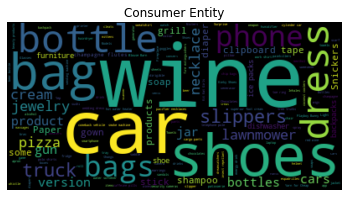

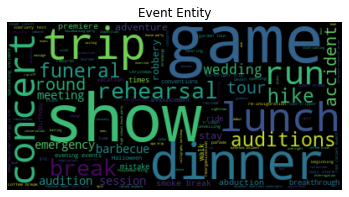

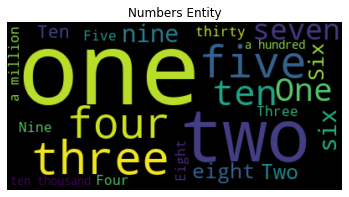

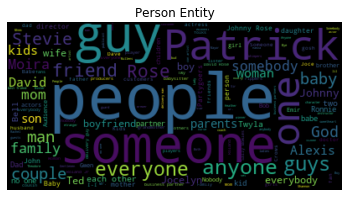

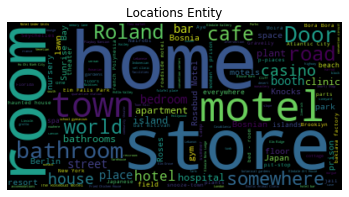

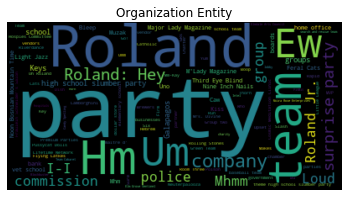

In [11]:
wordcloud = WordCloud().generate_from_frequencies(Counter(consumers))


# Display the generated image:

plt.title("Consumer Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(events))


# Display the generated image:
plt.title("Event Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(numbers))


# Display the generated image:
plt.title("Numbers Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(persons))


# Display the generated image:
plt.title("Person Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(locations))


# Display the generated image:
plt.title("Locations Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud = WordCloud().generate_from_frequencies(Counter(organizations))


# Display the generated image:
plt.title("Organization Entity")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
a = []
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    response2 = client.analyze_syntax(document)
    #response3 = client.classify_text(document)
    
    
    
    for j in range(len(response2.tokens)):
        a.append((response2.tokens[j].part_of_speech))
    #    print('Syntax: {}'.format(response2[j]))    
    #print('Sentiment: {}'.format(response1))
    
    #print('Sentiment: {}'.format(response3))
print(a)

[tag: PUNCT
, tag: NOUN
number: SINGULAR
, tag: NOUN
number: SINGULAR
, tag: NOUN
number: PLURAL
, tag: PUNCT
, tag: NOUN
number: SINGULAR
proper: PROPER
, tag: PUNCT
, tag: NOUN
number: PLURAL
, tag: PUNCT
, tag: PRON
case: GENITIVE
number: SINGULAR
person: SECOND
, tag: NOUN
number: SINGULAR
, tag: VERB
mood: INDICATIVE
number: SINGULAR
person: THIRD
tense: PRESENT
, tag: ADP
, tag: DET
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: CONJ
, tag: PRON
case: NOMINATIVE
gender: NEUTER
number: SINGULAR
person: THIRD
, tag: VERB
mood: INDICATIVE
number: SINGULAR
person: THIRD
tense: PRESENT
, tag: PRON
case: GENITIVE
gender: FEMININE
number: SINGULAR
person: THIRD
, tag: ADJ
, tag: NOUN
number: SINGULAR
, tag: ADP
, tag: NOUN
number: SINGULAR
, tag: PUNCT
, tag: CONJ
, tag: VERB
mood: IMPERATIVE
, tag: PRON
, tag: DET
, tag: VERB
, tag: ADJ
, tag: PRON
case: NOMINATIVE
number: PLURAL
person: FIRST
, tag: VERB
mood: INDICATIVE
tense: PRESENT
, tag: PRON
case: GENITIVE
gender: FEMININE
num

In [15]:
from google.cloud.language import types
for i in range(len(corpus)):
    document = types.Document(
        content=corpus[i],
        type=enums.Document.Type.PLAIN_TEXT)
    # Detects the sentiment of the text
    #sentiment = client.analyze_sentiment(document=document).document_sentiment
    #response = client.analyze_entities(document)
    #response1 = client.analyze_entity_sentiment(document)
    #response2 = client.analyze_syntax(document)
    response3 = client.classify_text(document)
    
    for j in range(len(response3.categories)):
        print('Classification of Letter '+ txt_files[i][:-4] )
        print((response3.categories[j].name))
        print("")
        print("")
    #print((response3.categories))
    #print('Sentiment: {}'.format(response1))
    #print('Sentiment: {}'.format(response2))
   # answer = ''
   # if response3 == '':
    #    answer='No Classification Determined'
    
    #else:
    #    answer = response3.name
    #print('Classification: {}'.format(answer))

Classification of Letter 05x02 - Love Letters
/Arts & Entertainment/Humor


Classification of Letter 05x03 - The Plant
/Arts & Entertainment


Classification of Letter 05x04 - The Dress
/Arts & Entertainment


Classification of Letter 05x04 - The Dress
/Pets & Animals/Pets


Classification of Letter 05x05 - Housewarming
/Arts & Entertainment


Classification of Letter 05x06 - Rock On!
/Arts & Entertainment


Classification of Letter 05x07 - A Whisper of Desire
/Arts & Entertainment


Classification of Letter 05x08 - The Hospies
/Arts & Entertainment/Performing Arts


Classification of Letter 05x10 - Roadkill
/Arts & Entertainment


Classification of Letter 05x11 - Meet the Parents
/Hobbies & Leisure


Classification of Letter 05x11 - Meet the Parents
/Pets & Animals/Pets


Classification of Letter 05x12 - The Roast
/Arts & Entertainment


Classification of Letter 05x13 - The Hike
/Arts & Entertainment


Classification of Letter 05x14 - Life is a Cabaret
/Arts & Entertainment




In [16]:
lang = 'english'
count = 10


for i in range(len(corpus)):
    new_string = corpus[i].replace('.', '. ').strip()
    lsa = LsaSummarizer(Stemmer(lang))
    lsa.stop_words = get_stop_words(lang)
    parser = PlaintextParser.from_string(new_string, Tokenizer(lang))
    lsa_summary = lsa(parser.document, count)
    lsa_s = [str(sent) for sent in lsa_summary]
    summary = ' '.join(lsa_s)
    print('Summary of '+ txt_files[i][:-4])
    print(summary)
    print("")
    print("")
    

Summary of 05x01 - The Crowening
Ted booked a tour of Elm Falls Park, which is like, a super cute look for us. (Dog barks) (Woman laughs) (Low hum of chatter) (Knocks) (Door latch clicks) Okay, I told the producers I would approve background on set. So it's kinda hard to build customer loyalty when your store is just like, spontaneously open or closed. Our director appears to be on a kamikaze mission to sink this ship, and I refuse to be the goddess on its prow! If Sandy Bullock hadn't fought to keep the Speed Franchise alive, we never would've had "Cruise Control". Yeah, and I couldn't imagine who wouldn't want to dangle feet in the air on a series of shaky logs. Yeah well, with my evenings free, I mean, normally at this time Moira and I are deciding on dinner plans, but uh. I even love those stupid rubber things you put on your fingers, 'cause you think they flip the pages faster. We're gonna talk about the fact that we missed half a day of work to make this happen, But you did just 

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (539) is lower than number of sentences (544). LSA algorithm may not work properly.



Summary of 05x03 - The Plant
Anyway, Emir Kaplan is a very influential travel blogger, so it is of the utmost importance that we all make him feel at home. - Well, I don't want to secon guess your publicity skills here Alexis, but I don't think it would hurt to tilt the scales in our favour. I know, I was once paid to talk up Heartblaster Energy Drink at a Third Eye Blind concert. I mean, if you're looking to pay some guy to lie about how great this motel is, I'm happy to step in. Well, I just feel bad because we really need to rehearse that Nine Inch Nails medley for our concert at "Yarn for Cheap. " After collaborating so closely with the director on "Crows," I feel even more finely attuned to the fluctuations of the human condition. And also I know you're thinking like, Alexis is becoming a major girl boss, and is she just saying this so she can expand her home office when I move out? I know that you've been getting a lot of massages lately, because they're supposed to help with you

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (562) is lower than number of sentences (611). LSA algorithm may not work properly.



Summary of 05x04 - The Dress
I once passed off a mini horse and three Guinea pigs as service animals, so anything is possible. Also, I've been neglecting my wellness journey, so the cherry blossoms opening when we both have time off is really ticking a lot of boxes for me. Well, I've come up with the perfect excuse for you to buy yourself a brand new hot water heater! And John, I tried to hang up my gown, and thank God I caught it before that silly curtain rod came crashing down! (Sighs) (Cars rumble) (Horn honks) (Muzak plays, phone rings) Oh, is that him? Well, I guess the good thing to come out of this abduction is that if anyone knows how to crawl out from under an embarrassing romantic failure, it's me. So I say we drop our bags, go straight to the botanical gardens, take in some cherry blossoms, then sleep it off, and go home fresh tomorrow. the hotel bar has karaoke, I say we get several rounds of polar bear shots, load up some Mariah, and I will spend the rest of the night pret

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (551) is lower than number of sentences (599). LSA algorithm may not work properly.



Summary of 05x05 - Housewarming
He told me he doesn't want my help,so I'm just gonna play the supportive partner, and watch him fail. Models and teen actors are just gonna lounge around in their bras and thongs, and take Polaroids of themselves all night? Uh, except it's Neuterpalooza week at work, and I still have two days of spaying and neutering ahead of me. My best friend, Summer, used to date Hef in high school, which isn't as weird as it sounds, 'cause he was like, a very young . Hmm, never have I ever pretended to be a pizza delivery person so I could get into Jared Leto's Halloween party. Which will be fine, I guess, it just means that I'll be staying up 'til : A. M.  on a Saturday, spaying with a pretty shaky hand. After you used all of my booze for your punch, the only alcohol left in my fridge was a few of your rum, raspberry, coconut coolers. (Moira's talks in movie) Partygoers: (Grunting noises) Oh my God, they just need to chill. I'm just all zen'd out from an hour and a 

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (590) is lower than number of sentences (591). LSA algorithm may not work properly.



Summary of 05x09 - The M.V.P.
(Crow caws, traffic rumbles) (Bat clunks) Is today the baseball day? Well on the upside, there is an Isabelle Huppert double feature playing at the Elmdale Art House. And I can't stomach the thought of Patrick's team winning by default; the man looks like a thumb! Well, excuse me, I thought you were in a bind, and needed a player, but uh, forget it, I'm taking my offer back. I can't think of anything worse than standing on a stage in front of a room full of people. If this is anything like my first day with the Pussycat Dolls, it'll be a couple of hours of Kegels, and then an afternoon of cheeky Bellinis. Okay, just so you're aware, I had a very cute, "my boyfriend's on the baseball team" spectator look prepared for today, and now I'm wearing tap shoes. - (Laughs nervously) After some quiet reflection, it occurred to me that this morning's exercises might've been a bit advanced. I don't mean to put any pressure on you, but you do realize that it's the bott

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (558) is lower than number of sentences (564). LSA algorithm may not work properly.



Summary of 05x10 - Roadkill
(Bell jingles, door shuts) (Engine hums) Unfortunately for everyone, John, Stevie turned out to be quite the find. Well, what kind of ailurophobe sends their kitty out to play on such a busy stretch of highway? David: Okay, this is the last of them, unless you wanted me to bring in the coffee cups and empty chip bags that are also in your back seat? - (Laughs nervously) - Well, baby's still sleeping, but if you wanna go and wake her up, tell her what happened, by all means. (Upset exhales) (Sobbing) Anyway, this feels like a very private family moment. Yeah, okay, well you took my bucks, and now I'd like a refund, because I realized I've used this stuff before, - and it makes my feet stink. Dave, I don't wanna tell you how to run your business, but or dollars for Gel Time is a total rip-off. And I'm ashamed to say, in my weaker moments, I've been tempted to cheat on poor, sweet Brad. So, the delivery man came in, used the bathroom, somehow broke the sink, an

c:\users\acham\appdata\local\programs\python\python37\lib\site-packages\sumy\summarizers\lsa.py:76: UserWarning:

Number of words (486) is lower than number of sentences (561). LSA algorithm may not work properly.



Summary of 05x11 - Meet the Parents
(Bird caws, dog barks) Okay so, as we all know, I think surprise parties are tacky, and far too often organized by well-intentioned people with very bad taste. I mean, meeting my best friend's son's boyfriend's parents for the very first time, I am very touched that you wanted me to share this moment with you. I found a very promising revenue stream to help finance the little deficit we've accrued - on "Cabaret". (Car rumbles) Okay, so I told Patrick that there's a salmonella outbreak at the cafe, so he will not be coming here until I tell him to tonight. choose a lie that doesn't make the cafe look like it's in violation of health codes? Well, they're definitely aware that you're business partners, it's just that uh, if I recall, at one point Patrick was engaged ahem. The woman has Emmys for playing a hot-headed nurse who healed people with her sexual touch. That's why I brought this couple home one day in college, and just told my parents to deal w